In [1]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGES_PATH = 'data/images/'

In [3]:
image = io.imread('../' + IMAGES_PATH + 'barcode-00-01.jpg')

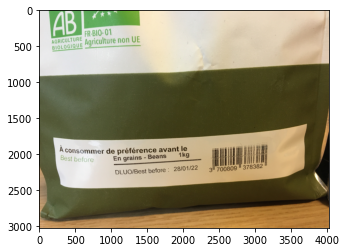

In [4]:
plt.imshow(image)

In [5]:
image = np.array(image).mean(axis=2).astype(np.uint8)

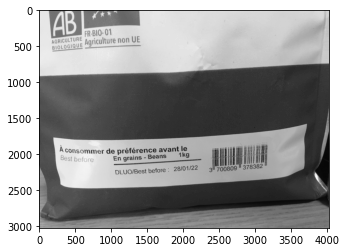

In [6]:
plt.imshow(image, cmap='gray')

In [12]:
tiles = []
n_cols = len(image[0])
n_rows = len(image)

for i in range(0, n_rows, 16):
    for j in range(0, n_cols, 16):
        tiles.append(image[i:i+16, j:j+16])

In [24]:
tile_size = 16
macro_blocks = []
rows, cols = image.shape[0] // tile_size, image.shape[1] // tile_size

for i in range(rows):
    for j in range(cols):
        macro_blocks.append(image[i * tile_size: (i+1) * tile_size, j * tile_size: (j+1) * tile_size])

In [16]:
np.split(x, [2,3])

[array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[ 8,  9, 10, 11]]),
 array([[12, 13, 14, 15]])]

In [30]:
index_table = [(0, 2), (1, 2), (2, 2), (2, 1), (2, 0), (1, 0), (0, 0), (0, 1)]
padding_row = np.zeros(18).astype(np.uint8).tolist()

In [9]:
def compute_lbp_value(lbp_window):
    lbp_value = 0
    pixel_value = lbp_window[1][1]
    for i in range(8):
        row_index, col_index = index_table[i]
        lbp_value += (lbp_window[row_index][col_index] >= pixel_value) ** i
        
    return lbp_value

In [35]:
def pad_tile(tile):
    tileList = tile.tolist()
    
    for i in range(16):
        tileList[i].insert(0, 0)
        tileList[i].append(0)
    tileList.insert(0, padding_row)
    tileList.append(padding_row)    
    return np.array(tileList)

def pad_tile_test(tile):
    
    rows, cols = tile.shape
    pad_tile = np.zeros((rows + 2, cols + 2))
    pad_tile[1: -1, 1 : -1] = tile
    
    return pad_tile

In [36]:
tileTest = pad_tile(tiles[0])
tileTest2 = pad_tile_test(tiles[0])

In [37]:
print(tileTest)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 225 226 228 229 229 228 227 226 230 230 229 228 227 227 228 229   0]
 [  0 225 226 227 228 228 228 228 227 230 230 229 228 227 227 228 229   0]
 [  0 225 226 226 227 227 228 228 228 228 229 230 229 228 228 228 229   0]
 [  0 227 227 227 227 227 228 229 229 228 228 230 229 229 228 229 229   0]
 [  0 227 227 227 227 228 228 229 230 228 228 229 228 228 227 228 228   0]
 [  0 228 227 228 227 228 228 229 230 228 229 229 228 227 227 227 228   0]
 [  0 227 227 227 227 227 228 229 229 229 229 228 227 226 226 227 228   0]
 [  0 226 226 226 227 227 228 228 229 229 229 228 227 226 226 227 228   0]
 [  0 226 226 225 225 225 227 228 229 228 229 228 228 227 227 229 230   0]
 [  0 226 226 226 226 226 227 227 228 229 229 228 227 227 227 228 229   0]
 [  0 227 227 227 227 226 227 227 227 230 229 229 227 227 226 227 228   0]
 [  0 228 228 227 227 226 227 227 228 230 230 229 227 227 226 226 227   0]
 [  0 229 228 227 226 227

In [13]:
histo_list = []

for tile in tiles:
    padded_tile = pad_tile(tile)
    lbp_histo = [0 for i in range(256)]
    
    for i in range(1, 17):
        for j in range(1, 17):
            window = padded_tile[i-1:i+2, j-1:j+2]
            lbp_histo[compute_lbp_value(window)] += 1    
            
    histo_list.extend(lbp_histo)
    
    

In [14]:
from sklearn.cluster import KMeans